In [1]:
import numpy as np
import pandas as pd
rng = np.random.default_rng(42)

def generate_students(n=200, seed=42):
 	rng = np.random.default_rng(seed)
 	hours_studied = rng.normal(5, 2, n).clip(1, 10)
 	marks = (hours_studied * rng.uniform(8, 12, n) + rng.normal(0, 5, n)).clip(30, 100)
 	gender = rng.choice(['Male', 'Female'], n)
 	subject = rng.choice(['Math', 'Science', 'English', 'History'], n)
 	study_method = rng.choice(['Solo', 'Group'], n, p=[0.6, 0.4])
 	attempts = rng.integers(1, 4, n)
 	return pd.DataFrame({
     	'hours_studied': hours_studied.round(2),
     	'marks': marks.round(2),
     	'gender': gender,
     	'subject': subject,
     	'study_method': study_method,
     	'attempts': attempts
 	})

def generate_daily_sales(n=60, seed=42):
 	rng = np.random.default_rng(seed)
 	base = pd.date_range(start='2024-01-01', periods=n, freq='D')
 	trend = np.linspace(50, 80, n)
 	season = 8 * np.sin(np.linspace(0, 3*np.pi, n))
 	noise = rng.normal(0, 3, n)
 	sales = (trend + season + noise).round(2)
 	return pd.DataFrame({'date': base, 'sales': sales})

# Example usage
students = generate_students(220)
sales = generate_daily_sales(90)

1. Using sales, draw a lineplot of date vs sales.
2. From students, plot hours_studied vs marks and color by gender.
3. Create a grid of scatterplots (hours_studied vs marks) faceted by subject.
4. Plot a histogram of marks with a KDE overlay.
5. Show the KDE curve for hours_studied.
6. Display the count of records per subject.
7. Draw a regression line for hours_studied and marks.
8. Create a pairplot and a jointplot for students' dataset.
9. Make a scatter plot of hours_studied vs marks using Plotly, colored by gender.
10. Draw a line chart of sales over date and a histogram of marks using Plotly.

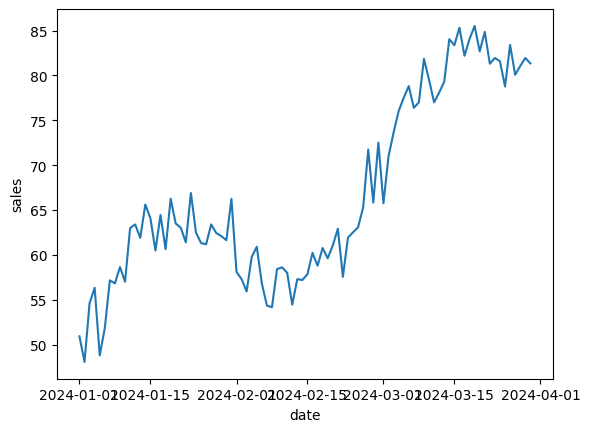

In [2]:
# 1
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.lineplot(data=sales, x="date", y="sales")
plt.show()

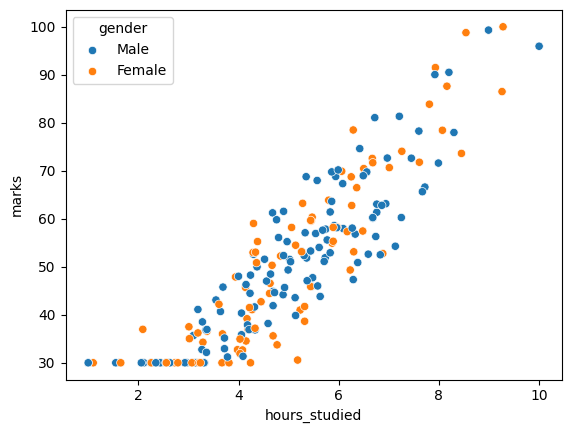

In [8]:
# 2

sns.scatterplot(data=students, x="hours_studied", y="marks", hue="gender")
plt.show()

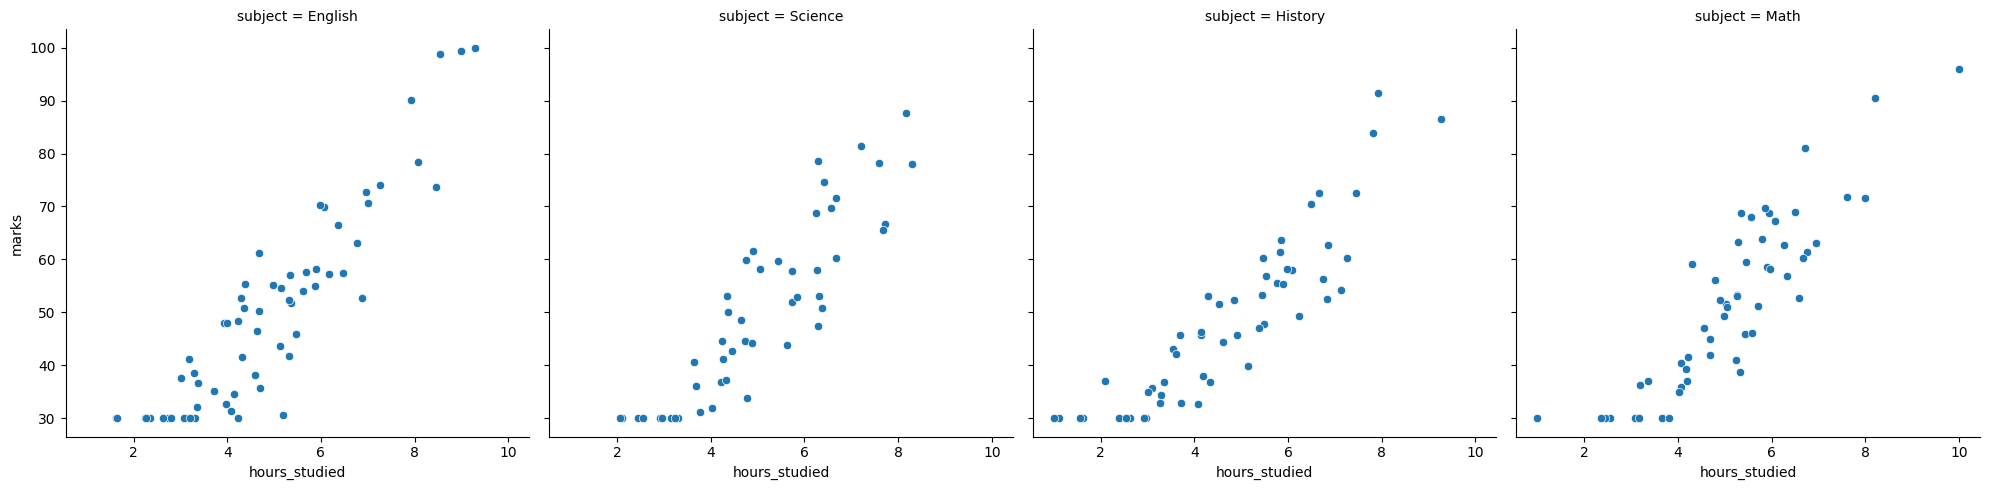

In [ ]:
# 3

sns.relplot(kind="scatter", data=students, x="hours_studied", y="marks", col="subject")
plt.show()

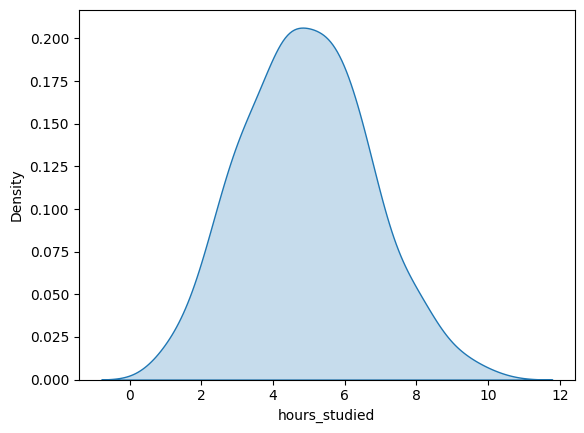

In [ ]:
# 5
sns.kdeplot(data=students, x="hours_studied", fill=True)
plt.show()

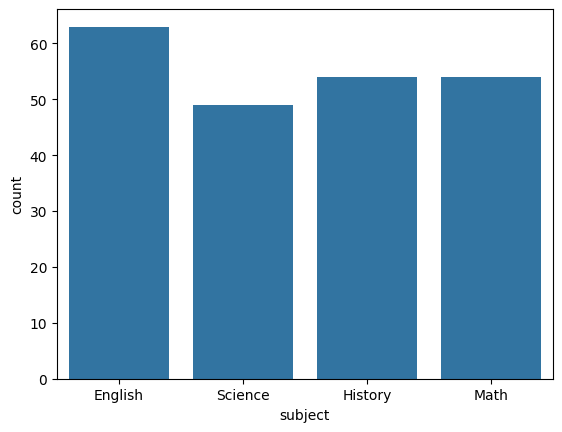

In [19]:
# 6

sns.countplot(data=students, x="subject")
plt.show()

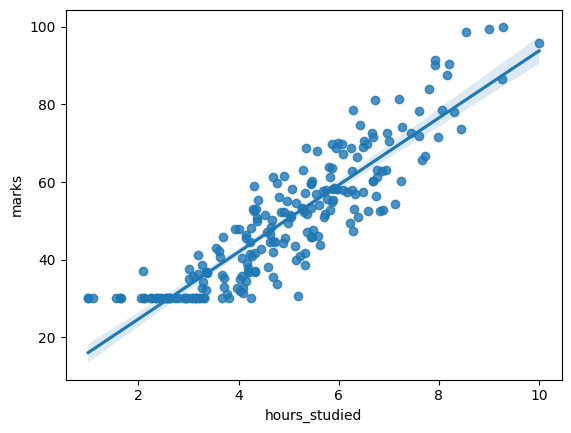

In [24]:
# 7

sns.regplot(data=students, x="hours_studied", y="marks")
plt.show()

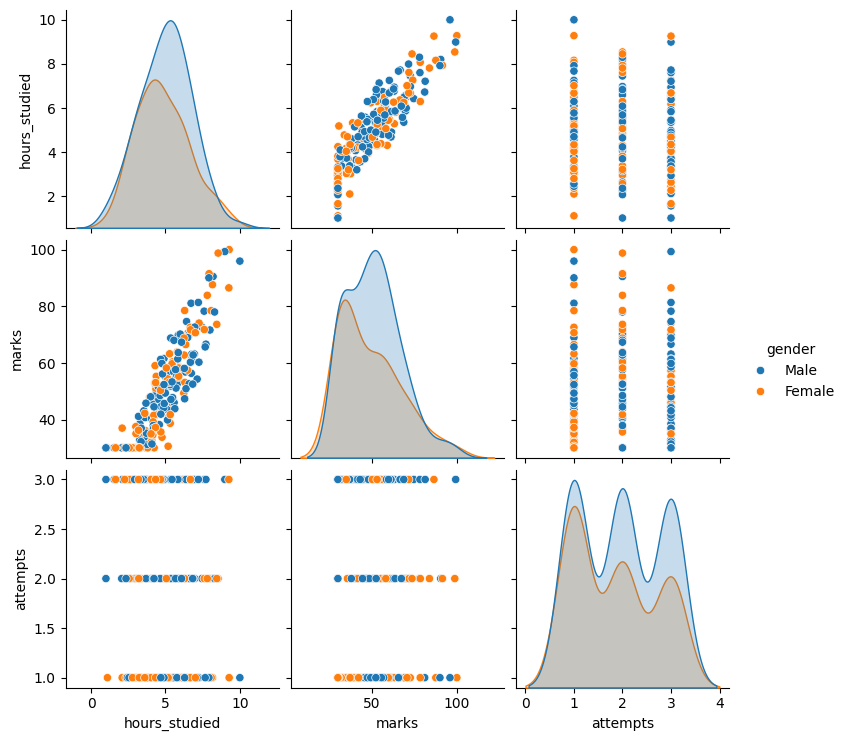

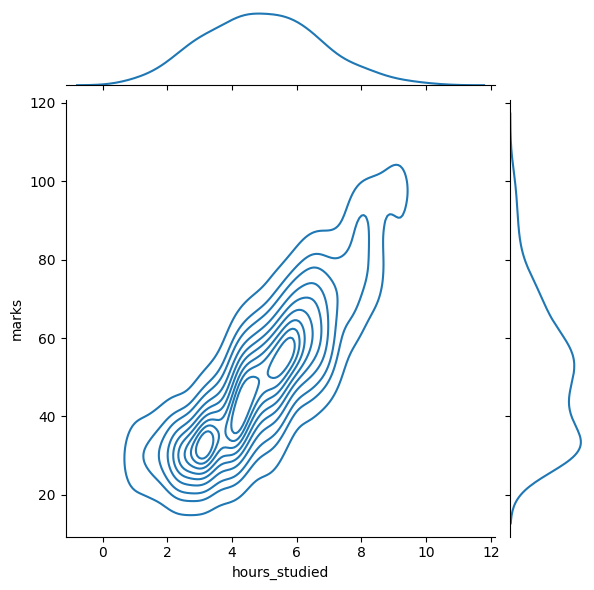

In [32]:
# 8

stu = students[["hours_studied","marks","attempts","gender"]]
sns.pairplot(data=stu,hue="gender")
plt.show()


sns.jointplot(data=stu , x='hours_studied', y='marks', kind='kde')
plt.show()

In [3]:
# 9 

fig = px.scatter(
    students,
    x="hours_studied",
    y="marks",
    color="gender"
)

fig.show()

In [ ]:
# 10

fig = px.line(sales, x="sales", y="date")
fig.show()

fig = px.histogram(students, x="marks")
fig.show()